In [ ]:
#link to get data
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv

In [ ]:
#read dataset so call dataset
import pandas as pd

mydata = pd.read_csv("/content/teleCust1000t.csv")

mydata.head() #read a few dataset

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",

         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",

         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",

         "peak-rpm","city-mpg","highway-mpg","price"]



mydata.columns = headers



mydata.head()



In [ ]:
mydata.isnull().sum()

From above, it said that there is no missing value. Why? This is because the null value in the dataframe are represent with symbol "?". However numpy libraries only read NaN as null value only.
*(memang tiada missing value sbb null value tu dia ganti dgn simbol tanda soal, sedangkan numpy just read NaN)*

In [ ]:
import numpy as np

mydata.replace("?", np.nan, inplace = True)

mydata.isnull().sum()

since we can replace mean values

In [ ]:
mean_normal = mydata['normalized-losses'].astype('float').mean()

mydata['normalized-losses'].replace(np.nan, mean_normal, inplace = True)

mydata.isnull().sum()

In [ ]:
mydata['num-of-doors'].value_counts()


when the null values in numerical colum value so replace it by mean

num of doors is categorical value so use the value_counts

In [ ]:
mydata['num-of-doors'].replace(np.nan,'four', inplace = True)

mydata.isnull().sum()

In [ ]:
mean_bore = mydata['bore'].astype('float').mean()

mydata['bore'].replace(np.nan, mean_bore, inplace = True)

mydata.isnull().sum()

In [ ]:
mean_stroke = mydata['stroke'].astype('float').mean()

mydata['stroke'].replace(np.nan, mean_stroke, inplace = True)

mydata.isnull().sum()

In [ ]:
mean_horsepower= mydata['horsepower'].astype('float').mean()

mydata['horsepower'].replace(np.nan, mean_horsepower , inplace = True)

mydata.isnull().sum()

In [ ]:
mean_peakrpm= mydata['peak-rpm'].astype('float').mean()

mydata['peak-rpm'].replace(np.nan, mean_peakrpm , inplace = True)

mydata.isnull().sum()

In [ ]:
mean_price= mydata['price'].astype('float').mean()

mydata['price'].replace(np.nan, mean_price , inplace = True)

mydata.isnull().sum()

In [ ]:
mydata.head(10)

In [ ]:
mydata.dtypes

from above, we can see that a few attributes that are not in the right datatype. for example, price datatype is in object, so I convert to numeric datatype

In [ ]:
mydata['normalized-losses'] =pd.to_numeric(mydata['normalized-losses'], errors='coerce')
mydata['bore'] =pd.to_numeric(mydata['bore'], errors='coerce')
mydata['stroke'] =pd.to_numeric(mydata['stroke'], errors='coerce')
mydata['horsepower'] =pd.to_numeric(mydata['horsepower'], errors='coerce')
mydata['peak-rpm'] =pd.to_numeric(mydata['peak-rpm'], errors='coerce')
mydata['price'] =pd.to_numeric(mydata['price'], errors='coerce')

In [ ]:
mydata.dtypes

In [ ]:
mydata.corr()

we can see 0.872335 price engine_size has the highets correlation because near to 1

-ve show if this correlation increase, the others is decrease
+ve show this correlatrion increase, others increase


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))

corr_df = mydata.corr()

sns.heatmap(corr_df, annot=True, cmap='RdBu')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))

corr_df = mydata.corr()

sns.heatmap(corr_df, cmap='RdBu')

at x axis, for price attributes, the box that have high correlated (dark colour), so it turn out 9 out of 26 attribute/feature are high correlated

so since, we know which attributes are high correlated, so we start building model

In [ ]:
# Build decision tree with default hyperparametes, then use cross-
# validation to tune them

# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Define the list of independent variable names
independent_vars = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
                    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Create the feature matrix X by selecting the columns corresponding to the independent variables
X = mydata[independent_vars]


In [ ]:

# Putting response/dependent variable/feature to y
y = mydata['price']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

X_train.head()

so, I train the dataset first before make predicitions

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
regressor = DecisionTreeRegressor(max_depth=5)

# Fit the regressor with X_train and y_train (assuming y_train contains continuous target values)
regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = regressor.predict(X_test)


Start to evaluate the model performance and analyze the result

In [ ]:
#evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")


In [ ]:
#visualize predictions
import matplotlib.pyplot as plt

# Create scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
#feature importance, know which one independent varaiables are most importanti in make predictions

feature_importance = regressor.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importances
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()


In [ ]:
#intepret the model
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

This is for testing if I put only the high correlated feature into the X only.

In [ ]:
# Define the list of independent variable names
independent_vars = ['normalized-losses', 'wheel-base', 'width', 'curb-weight', 'engine-size', 'compression-ratio',
                    'horsepower', 'peak-rpm', 'city-mpg']

# Create the feature matrix X by selecting the columns corresponding to the independent variables
X = mydata[independent_vars]

In [ ]:
# Putting response/dependent variable/feature to y
y = mydata['price']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
regressor = DecisionTreeRegressor(max_depth=5)

# Fit the regressor with X_train and y_train (assuming y_train contains continuous target values)
regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = regressor.predict(X_test)

In [ ]:
#evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 1918.6758162267836
Mean Squared Error (MSE): 7720903.521553165
Root Mean Squared Error (RMSE): 2778.6513853942106
R-squared (R^2): 0.8885121694718939


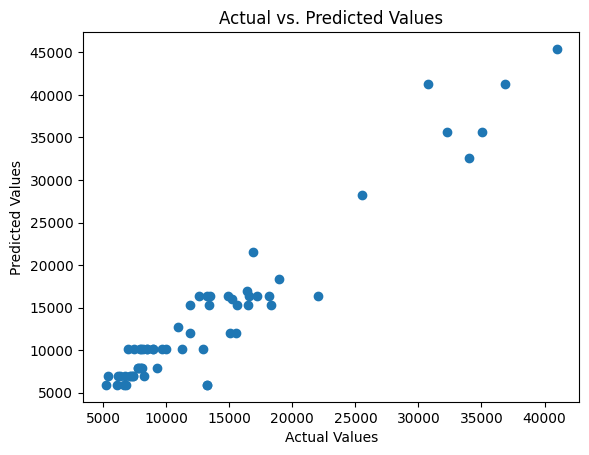

In [ ]:
#visualize predictions
import matplotlib.pyplot as plt

# Create scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

**Question?**

Is it necessary to know first the feature importance first, then assign it to X ?

Yes, there is difference in term of their accuracy if you put all feature into X or put the high correlated feature only into X.

It will give differences in term of their accuracy and the accuracy if you put high correlated feature only into X is much better compare you put all feature into X.

**Comparison?**

**This is if all feature into X:**


1) Mean Absolute Error (MAE): 1934.4419452590416

2) Mean Squared Error (MSE): 8265099.186875747

3) Root Mean Squared Error (RMSE): 2874.908552784896

4) R-squared (R^2): 0.88065412618198


**This is if high correlated accuracy into X:**

1) Mean Absolute Error (MAE): 1868.554848484848 (much better)

2) Mean Squared Error (MSE): 7411531.848166069 (much better)

3) Root Mean Squared Error (RMSE): 2722.4128724655393 (much better)

4) R-squared (R^2): 0.8929794156428238 (much better)




Thank you